In [76]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report,roc_auc_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [67]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')




In [68]:
# Define the target variable (e.g., 'target') and features (all other columns)
X_train = train.drop('readmitted', axis=1)  # Drop the target column for features
y_train = train['readmitted']  # Select the target column

X_test = test.drop('readmitted', axis=1)  # Same for test set
y_test = test['readmitted']

#### Feature scaling and balancing (RF does not need it)



In [69]:

# Standard Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Create a bagging classifier 
bagging_clf = BaggingClassifier()

# Train the bagging classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
acc_bag = accuracy_score(y_test, y_pred)
print("Bagging Classifier - Test Accuracy:", round(acc_bag, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))




Bagging Classifier - Test Accuracy: 0.89
Accuracy is 0.89
Precision is 0.36
Recall is 0.04


In [70]:
# Bagging With Random Undersampling
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Apply random undersampling to the training set
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Create a bagging classifier with random undersampling
bagging_classifier = BaggingClassifier()

# Train the bagging classifier on the resampled training data
bagging_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy of the model
acc_rndm = accuracy_score(y_test, y_pred)

print("Bagging Classifier with Random Undersampling - Test Accuracy:", round(acc_rndm, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))


Bagging Classifier with Random Undersampling - Test Accuracy: 0.65
Accuracy is 0.65
Precision is 0.15
Recall is 0.49


In [72]:

# Train a model (example using RandomForestClassifier)
# Standard Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier 
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the model
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Standard Random Forest Accuracy:",round(acc_rf, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_rf)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_rf)))


Standard Random Forest Accuracy: 0.89
Accuracy is 0.89
Precision is 0.59
Recall is 0.01


In [73]:
# Random Forest with Class Weighting
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with Class Weighting
rf_cw = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Random Forest classifier on the training data
rf_cw.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cw = rf_cw.predict(X_test)

# Calculate the accuracy of the model
acc_cw = accuracy_score(y_test, y_pred_cw)
print("Random Forest with Class Weighting Accuracy:",round(acc_cw, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_cw)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_cw)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_cw)))


Random Forest with Class Weighting Accuracy: 0.89
Accuracy is 0.89
Precision is 0.68
Recall is 0.01


In [75]:
# Random Forest with Random Undersampling
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Apply random undersampling to the training set
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Create a Random Forest classifier with random undersampling
rf_rus = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the resampled training data
rf_rus.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rus = rf_rus.predict(X_test)

# Calculate the accuracy of the model
acc_rus = accuracy_score(y_test, y_pred_rus)
print("Random Forest with Random Undersampling Accuracy:",round(acc_rus,2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_rus)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_rus)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_rus)))

Random Forest with Random Undersampling Accuracy: 0.63
Accuracy is 0.63
Precision is 0.17
Recall is 0.60


In [81]:
# Evaluate the model

# Calculate and print the accuracy
acc_rus = accuracy_score(y_test, y_pred_rus)
print("Random Forest with Random Undersampling Accuracy: {:.2f}".format(acc_rus))

# Calculate precision, recall, and F1-score for binary classification (assuming labels 0 and 1)
precision = precision_score(y_test, y_pred_rus)
recall = recall_score(y_test, y_pred_rus)
f1 = f1_score(y_test, y_pred_rus)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Print the classification report for detailed metrics across all classes
report = classification_report(y_test, y_pred_rus)
print("\nClassification Report:\n", report)

"""

Only 17% of the patients flagged as high risk for readmission were actually readmitted. This suggests the model generates a high number of false positives.
Recall (0.60):

The model successfully identifies 60% of the actual readmissions, which is decent. However, missing the remaining 40% (false negatives) could still have serious implications.
"""

Random Forest with Random Undersampling Accuracy: 0.63
Precision: 0.17
Recall: 0.60
F1 Score: 0.26

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     17836
           1       0.17      0.60      0.26      2213

    accuracy                           0.63     20049
   macro avg       0.55      0.62      0.51     20049
weighted avg       0.84      0.63      0.70     20049



'\n\nOnly 17% of the patients flagged as high risk for readmission were actually readmitted. This suggests the model generates a high number of false positives.\nRecall (0.60):\n\nThe model successfully identifies 60% of the actual readmissions, which is decent. However, missing the remaining 40% (false negatives) could still have serious implications.\n'

Confusion Matrix:
 [[11271  6565]
 [  883  1330]]


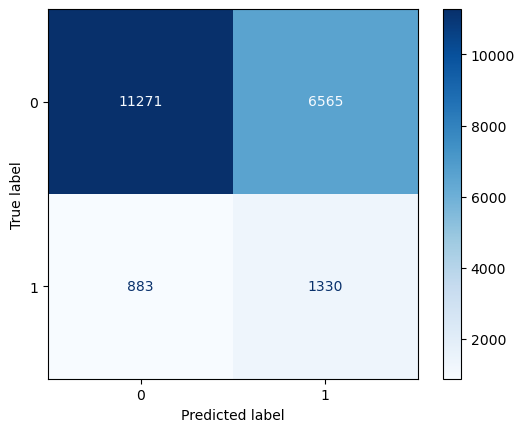

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rus)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_rus.classes_)
disp.plot(cmap='Blues')

In [4]:
"""""
# Identify the binary and continuous columns

# List of continuous columns that you want to scale
continuous_columns = ['age', 'time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient_log',
       'number_emergency_log', 'number_inpatient_log']

# Separate the continuous features
X_train_continuous = X_train[continuous_columns]
X_test_continuous = X_test[continuous_columns]

# Apply StandardScaler to the continuous features
scaler = StandardScaler()
X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
X_test_continuous_scaled = scaler.fit_transform(X_test_continuous)


# Convert the scaled features back to a DataFrame
X_train_continuous_scaled = pd.DataFrame(X_train_continuous_scaled, columns=continuous_columns)
X_test_continuous_scaled = pd.DataFrame(X_test_continuous_scaled, columns=continuous_columns)

# Concatenate the scaled continuous columns with the rest of the data
X_train_scaled = pd.concat([X_train.drop(continuous_columns, axis=1), X_train_continuous_scaled], axis=1)
X_test_scaled = pd.concat([X_test.drop(continuous_columns, axis=1), X_test_continuous_scaled], axis=1)
"""""



In [21]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Apply Borderline-SMOTE on the training set
smote = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=100)

# Train the Logistic Regression model on the resampled data
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")


Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17836
           1       0.34      0.02      0.04      2213

    accuracy                           0.89     20049
   macro avg       0.62      0.51      0.49     20049
weighted avg       0.83      0.89      0.84     20049

Test ROC-AUC Score: 0.6293


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:


# Split the training data into a new training set and validation set (80% training, 20% validation)
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
X_test,y_test = X_test_scaled,y_test
# Now X_train_split and y_train_split are used for training, and X_val and y_val are used for validation
# Print shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


print(f"Shape of X_train_val: {X_train_val.shape}")
print(f"Shape of y_train_val: {y_train_val.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train: (113848, 113)
Shape of y_train: (113848,)
Shape of X_train_val: (28462, 113)
Shape of y_train_val: (28462,)
Shape of X_test: (20049, 113)
Shape of y_test: (20049,)


In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [8]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the validation set
y_train_val_pred = model.predict(X_train_val)
y_val_pred_proba = model.predict_proba(X_train_val)[:, 1]

# Evaluate the model
print("Validation Classification Report:")
print(classification_report(y_train_val, y_train_val_pred))

print(f"Validation ROC-AUC Score: {roc_auc_score(y_train_val, y_val_pred_proba):.4f}")


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14186
           1       1.00      0.82      0.90     14276

    accuracy                           0.91     28462
   macro avg       0.92      0.91      0.91     28462
weighted avg       0.92      0.91      0.91     28462

Validation ROC-AUC Score: 0.9431


In [10]:
# Make final predictions on the test set

y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate on the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")


Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17836
           1       0.38      0.01      0.03      2213

    accuracy                           0.89     20049
   macro avg       0.64      0.51      0.48     20049
weighted avg       0.83      0.89      0.84     20049

Test ROC-AUC Score: 0.6339


Confusion Matrix:
[[17787    49]
 [ 2183    30]]


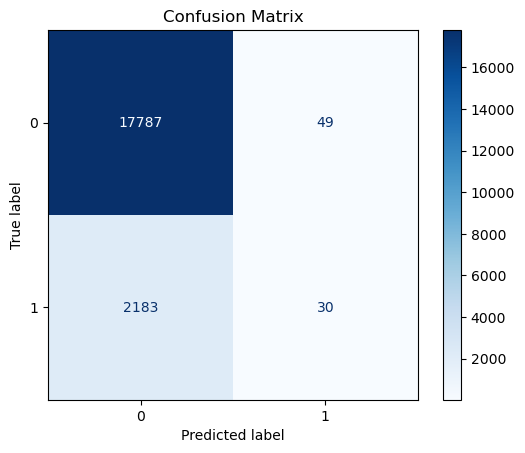

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer formatting
plt.title("Confusion Matrix")
plt.show()